In [21]:
pip install opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [23]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
#load test iamge
test1 = cv2.imread('data/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

Now let's display our loaded image. To display our image, I am going to use **plt.imshow(img, cmap)** function of `matplotlib`. 

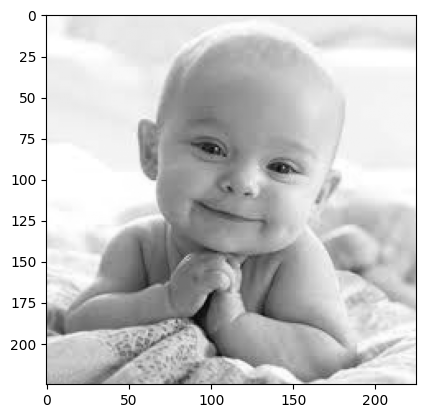

In [25]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [26]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

In [27]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


Ohooo! We detected our face.

Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces. 

In [28]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

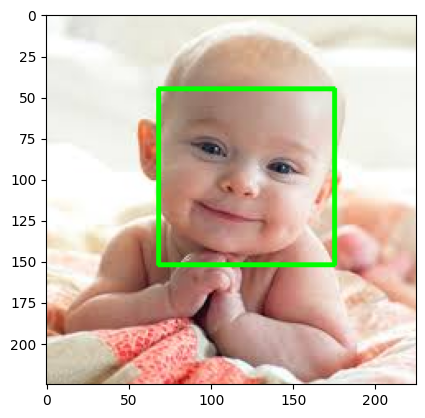

In [29]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

### Grouping Code into a Function

It would be easy and reusable if we grouped our face detection code into a function so let's make a function out of our code.

In [30]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

Now let's try this function on another test image. 

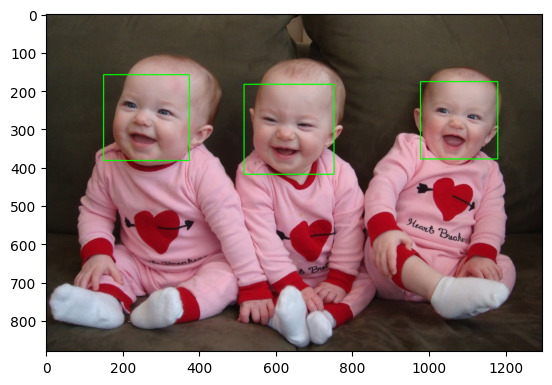

In [31]:
#load another image
test2 = cv2.imread('data/test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

### Dealing with false positives 

Let's try our face detector on another test image. 

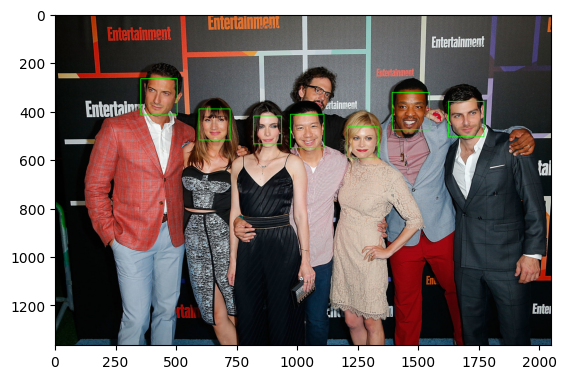

In [32]:
#load another image
test2 = cv2.imread('data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

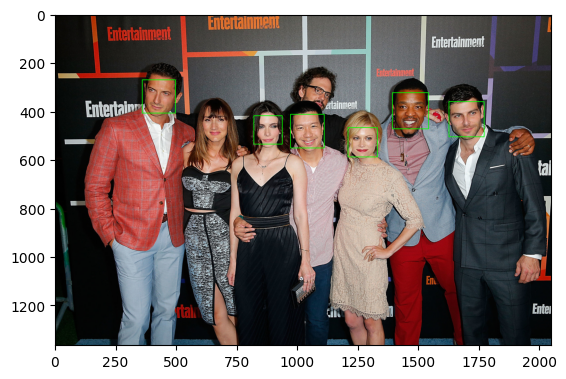

In [33]:
#load another image
test2 = cv2.imread('data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So you have to tune these parameters according to information you have about your data.

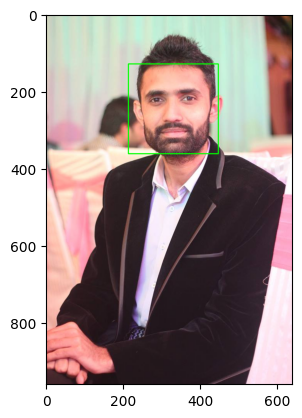

In [34]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('data/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

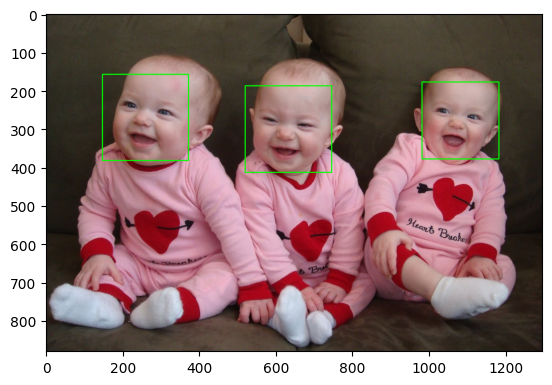

In [35]:
#load test image
test2 = cv2.imread('data/test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [36]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('data/test5.jpg')
#load test image2
test2 = cv2.imread('data/test6.jpg')

I have loaded both **Haar** and **LBP** classifiers and two test images **test1** and **test2**.

### Test-1

Let's first try both classifiers on test1 image.

In [37]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

In [38]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

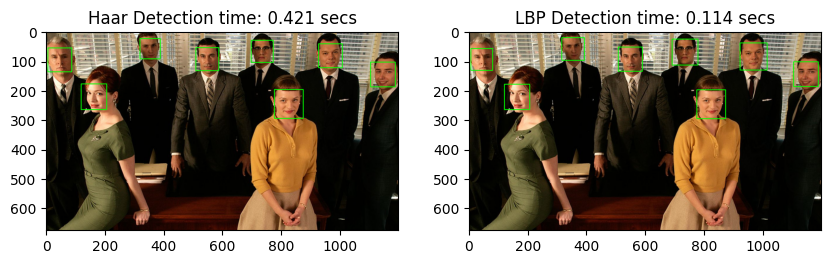

In [39]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

### Test-2 

Let's see the results for test2 image. The code is exactly same as for test1.

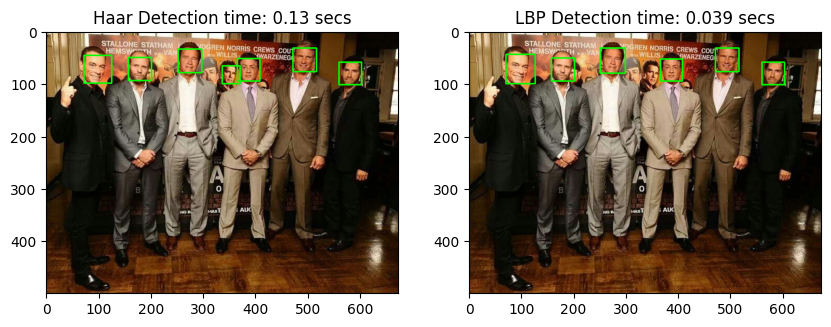

In [40]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)